1 How do you load and run inference on a custom image using the YOLOv8 model (labeled as YOLOv9)

In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model (YOLOv9 label might refer to this)
model = YOLO('yolov8n.pt')  # 'yolov8n.pt' is the nano model, replace with your custom weights path if any


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 77.4MB/s]


In [4]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # Load model
results = model('your_image.jpg')  # Run inference
results.show()  # Display predictions
results.save()  # Save output images with predictions

FileNotFoundError: your_image.jpg does not exist

2 How do you load the Faster RCNN model with a ResNet50 backbone and print its architecture6

In [6]:
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load the Faster R-CNN model with ResNet-50 backbone, pretrained on COCO
model = fasterrcnn_resnet50_fpn(pretrained=True)

# Print the model architecture
print(model)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

3  How do you perform inference on an online image using the Faster RCNN model and print the predictions6


In [7]:
pip install torch torchvision requests pillow

In [8]:
import torch
import torchvision.transforms as T
from PIL import Image
import requests
from io import BytesIO
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load the pretrained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set model to evaluation mode

# URL of the online image
url = "https://example.com/your-image.jpg"  # Replace with your image URL

# Load the image from URL
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert("RGB")

# Define the transformations: convert image to tensor
transform = T.Compose([T.ToTensor()])
img_tensor = transform(image)

# Run inference (wrap input in a list as model expects a batch)
with torch.no_grad():
    predictions = model([img_tensor])

# Print predictions
print(predictions)

# Optional: to print detected classes and boxes with scores above threshold
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog',
    'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
    'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

pred = predictions[0]

# Set a confidence threshold
threshold = 0.5

for idx in range(len(pred['boxes'])):
    score = pred['scores'][idx].item()
    if score > threshold:
        label = COCO_INSTANCE_CATEGORY_NAMES[pred['labels'][idx]]
        box = pred['boxes'][idx].tolist()
        print(f"Label: {label}, Confidence: {score:.2f}, Box coordinates: {box}")


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7943858bfba0>

4  How do you load an image and perform inference using YOLOv9, then display the detected objects with
bounding boxes and class labels

In [9]:
from ultralytics import YOLO
import cv2

# Load the YOLOv9 model (replace with your custom weights if needed)
model = YOLO('yolov8n.pt')  # or 'yolov9.pt' if you have that file

# Load your image path
image_path = 'path/to/your/image.jpg'

# Run inference
results = model(image_path)

# results.show()  # To open a window and display the image with detections (if GUI supported)

# Alternatively, visualize detections manually using OpenCV:
image = cv2.imread(image_path)

# Loop over detections and draw bounding boxes + labels
for result in results:
    boxes = result.boxes
    for box in boxes:
        # Get coordinates
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf[0].item()
        cls_id = int(box.cls[0].item())
        label = model.names[cls_id]

        # Draw rectangle
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Put label text above rectangle
        cv2.putText(image, f'{label} {conf:.2f}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Show image with detections
cv2.imshow('YOLOv9 Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

5 How do you display bounding boxes for the detected objects in an image using Faster RCNN6

In [10]:
import torch
import torchvision.transforms as T
from PIL import Image, ImageDraw, ImageFont
import requests
from io import BytesIO
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load model and set to eval mode
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load and preprocess image
url = "https://example.com/your-image.jpg"  # Replace with your image URL
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert("RGB")

transform = T.Compose([T.ToTensor()])
img_tensor = transform(image)

# Inference
with torch.no_grad():
    outputs = model([img_tensor])

# COCO dataset class names
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog',
    'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
    'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

output = outputs[0]

# Set confidence threshold
threshold = 0.5

# Prepare to draw
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()

# Draw boxes and labels
for box, score, label_idx in zip(output['boxes'], output['scores'], output['labels']):
    if score >= threshold:
        x1, y1, x2, y2 = box
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        label = COCO_INSTANCE_CATEGORY_NAMES[label_idx]
        draw.rectangle([(x1, y1), (x2, y2)], outline='red', width=3)
        draw.text((x1, y1 - 10), f"{label}: {score:.2f}", fill='red', font=font)

# Show the image
image.show()

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x794391f8fab0>

6  How do you perform inference on a local image using Faster RCNN

In [11]:
pip install torch torchvision pillow

In [12]:
import torch
import torchvision.transforms as T
from PIL import Image
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load pretrained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set to evaluation mode

# Load and preprocess local image
image_path = 'path/to/your/local/image.jpg'
image = Image.open(image_path).convert("RGB")

transform = T.Compose([T.ToTensor()])
img_tensor = transform(image)

# Run inference (model expects list of tensors)
with torch.no_grad():
    predictions = model([img_tensor])

# Output is a list with dict per image; get first item
pred = predictions[0]

# Print predicted classes, boxes, and scores above a threshold
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog',
    'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
    'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

threshold = 0.5

for box, label, score in zip(pred['boxes'], pred['labels'], pred['scores']):
    if score >= threshold:
        print(f"Detected {COCO_INSTANCE_CATEGORY_NAMES[label]} with confidence {score:.2f}")
        print(f"Bounding box: {box.tolist()}")


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your/local/image.jpg'

7 How can you change the confidence threshold for YOLO object detection and filter out low-confidence
predictions6

In [13]:
from ultralytics import YOLO

# Load model
model = YOLO('yolov8n.pt')  # or your YOLOv9 weights

# Run inference with confidence threshold set (e.g., 0.5)
results = model('path/to/image.jpg', conf=0.5)  # conf parameter sets confidence threshold

# Now results only contain predictions with confidence >= 0.5

FileNotFoundError: path/to/image.jpg does not exist

In [14]:
results = model('path/to/image.jpg')  # Run with default confidence

# Filter boxes manually:
filtered_boxes = []
filtered_scores = []
filtered_classes = []

for result in results:
    for box in result.boxes:
        conf = box.conf.item()
        if conf >= 0.5:
            filtered_boxes.append(box.xyxy)
            filtered_scores.append(conf)
            filtered_classes.append(box.cls)

# Now filtered_* contain only high-confidence predictions

FileNotFoundError: path/to/image.jpg does not exist

8 How do you plot the training and validation loss curves for model evaluation

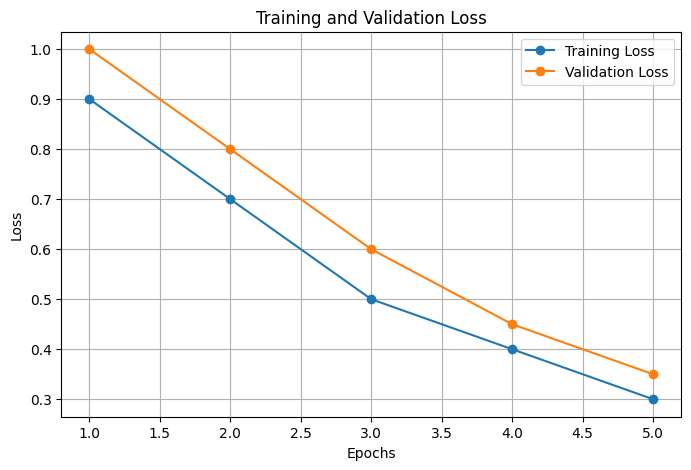

In [15]:
import matplotlib.pyplot as plt

# Example lists of loss values recorded during training
train_losses = [0.9, 0.7, 0.5, 0.4, 0.3]  # replace with your actual training losses per epoch
val_losses = [1.0, 0.8, 0.6, 0.45, 0.35]  # replace with your actual validation losses per epoch

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_losses, label='Training Loss', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', marker='o')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

9 How do you perform inference on multiple images from a local folder using Faster RCNN and display the
bounding boxes for each6

In [19]:
import os
import torch
import torchvision.transforms as T
from PIL import Image, ImageDraw, ImageFont
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Path to your images folder
image_folder = 'path/to/your/images_folder'

# Load pretrained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# COCO classes
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog',
    'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
    'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

# Define transformation
transform = T.Compose([T.ToTensor()])

# Confidence threshold to filter weak detections
threshold = 0.5

# Load font for drawing labels (optional)
font = ImageFont.load_default()

# Iterate over images in folder




        # Draw bounding boxes and labels
for box, score, label_idx in zip(output['boxes'], output['scores'], output['labels']):

    if score >= threshold:

      x1, y1, x2, y2 = box
      x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
      label = COCO_INSTANCE_CATEGORY_NAMES[label_idx]
      draw.rectangle([(x1, y1), (x2, y2)], outline='red', width=3)
      draw.text((x1, y1 - 10), f"{label}: {score:.2f}", fill='red', font=font)

        # Display the image with detections
      image.show()


NameError: name 'output' is not defined

10 How do you visualize the confidence scores alongside the bounding boxes for detected objects using Faster
RCNN6

In [20]:
import torch
import torchvision.transforms as T
from PIL import Image, ImageDraw, ImageFont
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load pretrained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load and preprocess image
image_path = 'path/to/image.jpg'
image = Image.open(image_path).convert("RGB")
transform = T.Compose([T.ToTensor()])
img_tensor = transform(image)

# COCO class names
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog',
    'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
    'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

threshold = 0.5  # Confidence threshold

with torch.no_grad():
    outputs = model([img_tensor])

output = outputs[0]
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()

for box, score, label_idx in zip(output['boxes'], output['scores'], output['labels']):
    if score >= threshold:
        x1, y1, x2, y2 = box
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        label = COCO_INSTANCE_CATEGORY_NAMES[label_idx]
        # Draw bounding box
        draw.rectangle([(x1, y1), (x2, y2)], outline='red', width=3)
        # Draw label + confidence score
        text = f"{label}: {score:.2f}"
        draw.text((x1, y1 - 10), text, fill='red', font=font)

image.show()

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/image.jpg'

12 = How can you save the inference results (with bounding boxes) as a new image after performing detection
using YOLO?

In [21]:
from ultralytics import YOLO

# Load YOLO model (YOLOv8 or YOLOv9 weights)
model = YOLO('yolov8n.pt')  # or your custom weights

# Run inference on image
results = model('path/to/image.jpg')

# results[0].plot() returns an image with bounding boxes drawn (as a NumPy array)
annotated_img = results[0].plot()

# Convert to PIL Image and save
from PIL import Image
im = Image.fromarray(annotated_img)
im.save('output_with_boxes.jpg')

FileNotFoundError: path/to/image.jpg does not exist